In [2]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns
import missingno as msno
sns.set()
%matplotlib inline

import geopandas as gpd

import sqlite3 as sql
import warnings
warnings.filterwarnings('ignore')
from shapely.geometry import Point,LineString

In [3]:
data=pd.read_csv('AB_NYC_2019.csv')

In [4]:
data.fillna({'reviews_per_month':0},inplace=True)

In [5]:
data.drop('last_review',inplace=True,axis=1)

In [6]:
data['id'].nunique()


48895

In [7]:
data['host_id'].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
1641589        1
4070519        1
208106618      1
235939247      1
1288080        1
Name: host_id, Length: 37457, dtype: int64

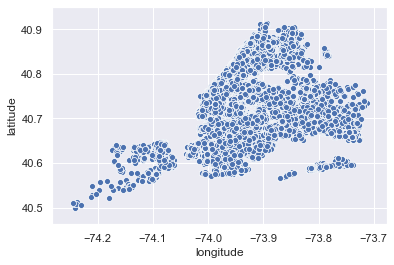

In [8]:
sns.scatterplot(data['longitude'],data['latitude'])

In [9]:
new_york=gpd.read_file('maps/nybbwi.shp')

In [10]:
pd.set_option('display.max_columns', len(geo_data.columns))

NameError: name 'geo_data' is not defined

In [11]:
new_york

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,2,Bronx,188054.398137,1.598379e+09,"POLYGON ((1021632.336 267934.439, 1022108.577 ..."
1,5,Staten Island,210579.552313,2.532696e+09,"POLYGON ((968762.067 175987.749, 968654.251 17..."
2,3,Brooklyn,234924.030131,2.684410e+09,"POLYGON ((1004421.481 203543.225, 1004612.108 ..."
3,4,Queens,429582.281880,3.858051e+09,"POLYGON ((1045438.075 235083.296, 1049675.845 ..."
4,1,Manhattan,203803.483188,9.442946e+08,"MULTIPOLYGON (((972081.788 190733.467, 972184...."


In [12]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [13]:
def geographical_point(cols):
    longitude=float(cols[0])
    latitude=float(cols[1])
    return Point(longitude,latitude)

In [14]:
data['geometric_points']=data[['longitude','latitude']].apply(geographical_point,axis=1)

In [15]:
geo_data=gpd.GeoDataFrame(data,geometry='geometric_points')

In [16]:
new_york.drop('BoroCode',inplace=True,axis=1)

In [17]:
new_york.set_index('BoroName')

,Shape_Leng,Shape_Area,geometry
BoroName,,,
Bronx,188054.398137,1.598379e+09,"POLYGON ((1021632.336 267934.439, 1022108.577 ..."
Staten Island,210579.552313,2.532696e+09,"POLYGON ((968762.067 175987.749, 968654.251 17..."
Brooklyn,234924.030131,2.684410e+09,"POLYGON ((1004421.481 203543.225, 1004612.108 ..."
Queens,429582.281880,3.858051e+09,"POLYGON ((1045438.075 235083.296, 1049675.845 ..."
Manhattan,203803.483188,9.442946e+08,"MULTIPOLYGON (((972081.788 190733.467, 972184...."


In [20]:
subway_stations

,line,name,notes,objectid,url,geometry
0,4-6-6 Express,Astor Pl,"4 nights, 6-all times, 6 Express-weekdays AM s...",1.0,http://web.mta.info/nyct/service/,POINT (-73.99107 40.73005)
1,4-6-6 Express,Canal St,"4 nights, 6-all times, 6 Express-weekdays AM s...",2.0,http://web.mta.info/nyct/service/,POINT (-74.00019 40.71880)
2,1-2,50th St,"1-all times, 2-nights",3.0,http://web.mta.info/nyct/service/,POINT (-73.98385 40.76173)
3,2-3-4,Bergen St,"4-nights, 3-all other times, 2-all times",4.0,http://web.mta.info/nyct/service/,POINT (-73.97500 40.68086)
4,3-4,Pennsylvania Ave,"4-nights, 3-all other times",5.0,http://web.mta.info/nyct/service/,POINT (-73.89489 40.66471)
...,...,...,...,...,...,...
468,D-F-N-Q,Coney Island - Stillwell Av,"D,F,N,Q-all times",469.0,http://web.mta.info/nyct/service/,POINT (-73.98124 40.57728)
469,7-7 Express,34th St - Hudson Yards,"7-all times, 7 Express-rush hours AM westbound...",470.0,http://web.mta.info/nyct/service/,POINT (-74.00220 40.75545)
470,Q,72nd St,Q-all times,641.0,http://web.mta.info/nyct/service/,POINT (-73.95836 40.76880)
471,Q,86th St,Q-all times,642.0,http://web.mta.info/nyct/service/,POINT (-73.95177 40.77786)


In [19]:
subway_stations=gpd.read_file('subway2/geo_export_15e1fa1c-925b-45f9-8544-a91d446496dc.shp')

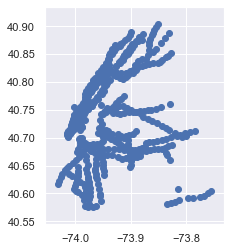

In [21]:
subway_stations.plot()

(-74.05056352943278, -73.73571747067217, 40.55360861880517, 40.925550199839726)

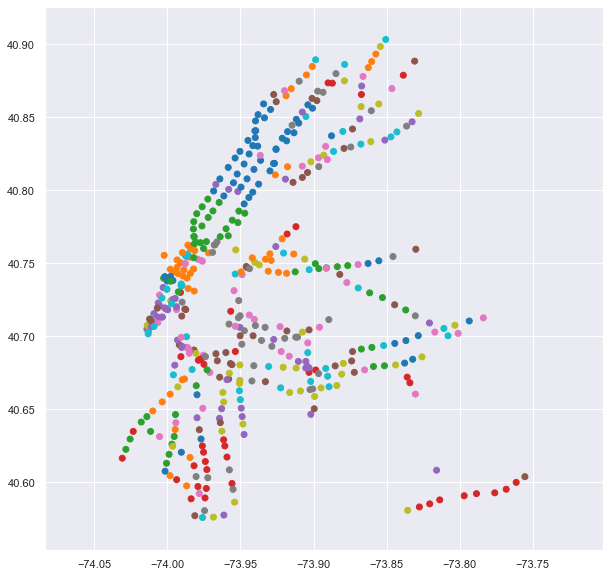

In [22]:
ax=subway_stations.plot(column='name',figsize=(10,10))
ax.axis('equal')

In [23]:
subway_stations.drop(['notes','objectid','url'],inplace=True,axis=1)

In [24]:
subway_stations

,line,name,geometry
0,4-6-6 Express,Astor Pl,POINT (-73.99107 40.73005)
1,4-6-6 Express,Canal St,POINT (-74.00019 40.71880)
2,1-2,50th St,POINT (-73.98385 40.76173)
3,2-3-4,Bergen St,POINT (-73.97500 40.68086)
4,3-4,Pennsylvania Ave,POINT (-73.89489 40.66471)
...,...,...,...
468,D-F-N-Q,Coney Island - Stillwell Av,POINT (-73.98124 40.57728)
469,7-7 Express,34th St - Hudson Yards,POINT (-74.00220 40.75545)
470,Q,72nd St,POINT (-73.95836 40.76880)
471,Q,86th St,POINT (-73.95177 40.77786)


In [25]:
geo_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,geometric_points
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,POINT (-73.97237 40.64749)
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,POINT (-73.98377 40.75362)
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,POINT (-73.94190 40.80902)
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,POINT (-73.95976 40.68514)
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,POINT (-73.94399 40.79851)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9,POINT (-73.94995 40.67853)
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36,POINT (-73.93317 40.70184)
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27,POINT (-73.94867 40.81475)
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2,POINT (-73.99112 40.75751)


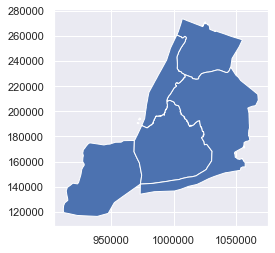

In [26]:
new_york.plot()

In [27]:
restaurants=pd.read_csv('restaurants/NYC Restaurants Geocoded - Sheet1.csv')

In [28]:
restaurants=restaurants.rename(columns={'BRUNOS ON THE BOULEVARD 88-25 ASTORIA BOULEVARD New York NY 11369':'restaurant_name',
                          '40.7643124':'latitude','-73.8803827':'longitude'})

In [29]:
restaurants.drop('{lng=-73.8803827, lat=40.7643124}',axis=1,inplace=True)

In [30]:
restaurants

,restaurant_name,latitude,longitude
0,WILD ASIA 2300 SOUTHERN BOULEVARD New York NY ...,40.850288,-73.878611
1,P & S DELI GROCERY 730 COLUMBUS AVENUE New Yor...,40.792559,-73.968057
2,ANGELIKA FILM CENTER 18 WEST HOUSTON STREET Ne...,40.725063,-73.997695
3,SHASHEMENE INT'L RESTAURA 195 EAST 56 STREET N...,40.651588,-73.933043
4,CARVEL ICE CREAM 1006 EAST 233 STREET New York...,40.888739,-73.847787
...,...,...,...
24951,"NEW REDSTONE ROCKET, CORP 32-35 48 AVENUE New ...",40.744309,-73.941860
24952,ANDALUCIA BAR & LOUNGE 1336 BUSHWICK AVENUE Ne...,40.685681,-73.911931
24953,Pizza Studio 444 EAST FORDHAM ROAD New York NY...,40.860998,-73.890113
24954,APPLEBEES NEIGHBORHOOD GRILL & BAR 448 GATEWAY...,40.652456,-73.870461


In [31]:
restaurants['geometry']=restaurants[['longitude','latitude']].apply(geographical_point,axis=1)

In [32]:
restaurants

,restaurant_name,latitude,longitude,geometry
0,WILD ASIA 2300 SOUTHERN BOULEVARD New York NY ...,40.850288,-73.878611,POINT (-73.8786113 40.8502883)
1,P & S DELI GROCERY 730 COLUMBUS AVENUE New Yor...,40.792559,-73.968057,POINT (-73.9680572 40.79255870000001)
2,ANGELIKA FILM CENTER 18 WEST HOUSTON STREET Ne...,40.725063,-73.997695,POINT (-73.9976946 40.7250632)
3,SHASHEMENE INT'L RESTAURA 195 EAST 56 STREET N...,40.651588,-73.933043,POINT (-73.9330429 40.65158820000001)
4,CARVEL ICE CREAM 1006 EAST 233 STREET New York...,40.888739,-73.847787,POINT (-73.8477874 40.8887394)
...,...,...,...,...
24951,"NEW REDSTONE ROCKET, CORP 32-35 48 AVENUE New ...",40.744309,-73.941860,POINT (-73.9418603 40.7443091)
24952,ANDALUCIA BAR & LOUNGE 1336 BUSHWICK AVENUE Ne...,40.685681,-73.911931,POINT (-73.91193100000001 40.685681)
24953,Pizza Studio 444 EAST FORDHAM ROAD New York NY...,40.860998,-73.890113,POINT (-73.8901133 40.8609981)
24954,APPLEBEES NEIGHBORHOOD GRILL & BAR 448 GATEWAY...,40.652456,-73.870461,POINT (-73.87046140000001 40.6524556)


In [33]:
new_york

,BoroName,Shape_Leng,Shape_Area,geometry
0,Bronx,188054.398137,1.598379e+09,"POLYGON ((1021632.336 267934.439, 1022108.577 ..."
1,Staten Island,210579.552313,2.532696e+09,"POLYGON ((968762.067 175987.749, 968654.251 17..."
2,Brooklyn,234924.030131,2.684410e+09,"POLYGON ((1004421.481 203543.225, 1004612.108 ..."
3,Queens,429582.281880,3.858051e+09,"POLYGON ((1045438.075 235083.296, 1049675.845 ..."
4,Manhattan,203803.483188,9.442946e+08,"MULTIPOLYGON (((972081.788 190733.467, 972184...."


(904532.2967956543, 1075137.2805969235, 108551.04780883789, 281478.1667907715)

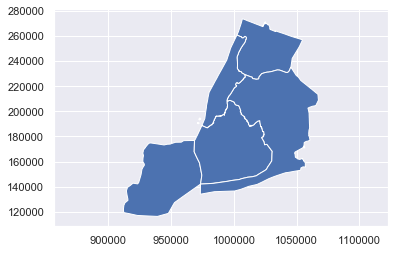

In [35]:
new_york.plot().axis('equal')

In [36]:
restaurants=gpd.GeoDataFrame(restaurants,geometry=restaurants.geometry,crs=new_york.crs)

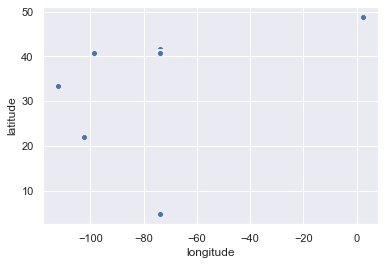

In [37]:
sns.scatterplot(restaurants['longitude'],restaurants['latitude'])

In [38]:
restaurants.dropna(axis=0,inplace=True)

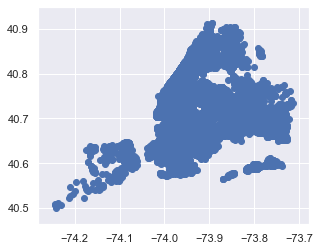

In [39]:
geo_data.plot()

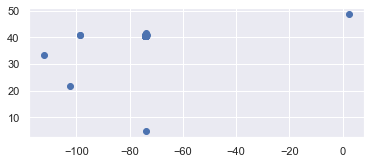

In [40]:
restaurants.plot()

In [41]:
restaurants=restaurants[(restaurants['longitude']<-73.7) & (restaurants['longitude']>-74.2)]

In [42]:
restaurants=restaurants[(restaurants['latitude']>=40.5)&(restaurants['latitude']<=40.9)]

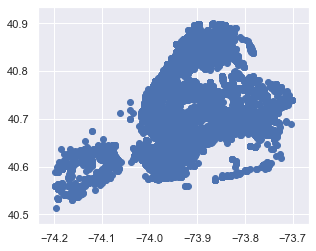

In [43]:
restaurants.plot()

In [44]:
data_dict={'name':['Statue Of Liberty','Central Park','Rockefeller Center',
                   'Metropolitan Museum of Art','Broadway and the Theater District',
                  'Empire State Building','9/11 Memorial and Museum','Times Square','High Line',
                  'Brooklyn Bridge','Fifth Avenue','Grand Central Terminal',
                  'One World Observatory','The Frick Collection','New York Public Library',
                  'Wall Street','Radio City Music Hall','St. Patricks Cathedral','Carnegie Hall',
                  'Bryant Park','Chrysler Building','Threater District','Prospect Park',
                   'Brooklyn Museum','Bronx Zoo Wildlife Conservation Society'],
           'longitude':['-74.0445','-73.9683','-73.9787','-73.962311','-73.974709','-73.985428',
                       '-74.008166634','-73.985130','-74.004765','-73.996864','-73.966003',
                       '-73.977295','-74.013368','-73.967399','-73.982254','-74.008827','-73.979977',
                       '-73.975993','-73.9797','-73.967399','-73.975502','-73.98626','-73.969749',
                       '-73.963631','-73.87538'],
           'latitude':['40.6892','40.7851','40.7587','40.778965','40.790886','40.748817',
                       '40.7070138386','40.758896','40.747993','40.706086','40.773998',
                      '40.752655','40.713344','40.771209','40.753181','40.706005','40.759976',
                      '40.758465','40.7648','40.771209','40.751621','40.75659','40.665535',
                      '40.671206','40.850581']}



In [45]:
tourist_attractions=pd.DataFrame(data=data_dict)
tourist_attractions

,name,longitude,latitude
0,Statue Of Liberty,-74.0445,40.6892
1,Central Park,-73.9683,40.7851
2,Rockefeller Center,-73.9787,40.7587
3,Metropolitan Museum of Art,-73.962311,40.778965
4,Broadway and the Theater District,-73.974709,40.790886
5,Empire State Building,-73.985428,40.748817
6,9/11 Memorial and Museum,-74.008166634,40.7070138386
7,Times Square,-73.985130,40.758896
8,High Line,-74.004765,40.747993
9,Brooklyn Bridge,-73.996864,40.706086


In [46]:
tourist_attractions['geometry']=tourist_attractions[['longitude','latitude']].apply(geographical_point,axis=1)

In [47]:
new_york=new_york.to_crs(epsg=4326)

In [48]:
tourist_attractions=gpd.GeoDataFrame(tourist_attractions,geometry=tourist_attractions.geometry,
                                     crs=new_york.crs)

In [49]:
tourist_attractions_NYC=gpd.GeoDataFrame(crs=new_york.crs)

In [50]:
tourist_attractions_NYC=gpd.sjoin(tourist_attractions,new_york,how='inner',op='within')

In [51]:
subway_stations_NYC=gpd.sjoin(subway_stations,new_york,how='inner',op='within')

In [52]:
restaurants_NYC=gpd.sjoin(restaurants,new_york,how='inner',op='within')

In [53]:
restaurants_NYC

,restaurant_name,latitude,longitude,geometry,index_right,BoroName,Shape_Leng,Shape_Area
0,WILD ASIA 2300 SOUTHERN BOULEVARD New York NY ...,40.850288,-73.878611,POINT (-73.87861 40.85029),0,Bronx,188054.398137,1.598379e+09
4,CARVEL ICE CREAM 1006 EAST 233 STREET New York...,40.888739,-73.847787,POINT (-73.84779 40.88874),0,Bronx,188054.398137,1.598379e+09
13,MANHEM CLUB 658 CLARENCE AVE New York NY 10465,40.829411,-73.813640,POINT (-73.81364 40.82941),0,Bronx,188054.398137,1.598379e+09
33,MCDWYERS PUB 331 EAST 204 STREET New York NY 1...,40.872399,-73.871310,POINT (-73.87131 40.87240),0,Bronx,188054.398137,1.598379e+09
45,MUNCHTIME 21 EAST 170 STREET New York NY 10452,40.837632,-73.921286,POINT (-73.92129 40.83763),0,Bronx,188054.398137,1.598379e+09
...,...,...,...,...,...,...,...,...
24829,SEAN M. BRODERICK UNITED HEALTH & FITNESS LLC ...,40.542534,-74.165398,POINT (-74.16540 40.54253),1,Staten Island,210579.552313,2.532696e+09
24840,BARIO'S 1400 TRAVIS AVE New York NY 10314,40.602682,-74.184145,POINT (-74.18414 40.60268),1,Staten Island,210579.552313,2.532696e+09
24872,MICHAEL'S MEATBALLS & MARTINIS 1816 HYLAN BOUL...,40.584882,-74.093848,POINT (-74.09385 40.58488),1,Staten Island,210579.552313,2.532696e+09
24927,E & E ZHU INC 2510 HYLAN BOULEVARD New York NY...,40.570267,-74.109851,POINT (-74.10985 40.57027),1,Staten Island,210579.552313,2.532696e+09


In [54]:
# restaurants.crs

In [55]:
new_york['geometry']

0    POLYGON ((-73.86477 40.90201, -73.86305 40.901...
1    POLYGON ((-74.05581 40.64971, -74.05619 40.639...
2    POLYGON ((-73.92722 40.72533, -73.92654 40.724...
3    POLYGON ((-73.77896 40.81171, -73.76371 40.793...
4    MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...
Name: geometry, dtype: geometry

In [56]:
tourist_attractions_NYC

,name,longitude,latitude,geometry,index_right,BoroName,Shape_Leng,Shape_Area
0,Statue Of Liberty,-74.0445,40.6892,POINT (-74.04450 40.68920),4,Manhattan,203803.483188,9.442946e+08
1,Central Park,-73.9683,40.7851,POINT (-73.96830 40.78510),4,Manhattan,203803.483188,9.442946e+08
2,Rockefeller Center,-73.9787,40.7587,POINT (-73.97870 40.75870),4,Manhattan,203803.483188,9.442946e+08
3,Metropolitan Museum of Art,-73.962311,40.778965,POINT (-73.96231 40.77896),4,Manhattan,203803.483188,9.442946e+08
4,Broadway and the Theater District,-73.974709,40.790886,POINT (-73.97471 40.79089),4,Manhattan,203803.483188,9.442946e+08
5,Empire State Building,-73.985428,40.748817,POINT (-73.98543 40.74882),4,Manhattan,203803.483188,9.442946e+08
6,9/11 Memorial and Museum,-74.008166634,40.7070138386,POINT (-74.00817 40.70701),4,Manhattan,203803.483188,9.442946e+08
7,Times Square,-73.985130,40.758896,POINT (-73.98513 40.75890),4,Manhattan,203803.483188,9.442946e+08
8,High Line,-74.004765,40.747993,POINT (-74.00477 40.74799),4,Manhattan,203803.483188,9.442946e+08
9,Brooklyn Bridge,-73.996864,40.706086,POINT (-73.99686 40.70609),4,Manhattan,203803.483188,9.442946e+08


In [57]:
geo_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,geometric_points
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,POINT (-73.97237 40.64749)
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,POINT (-73.98377 40.75362)
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,POINT (-73.94190 40.80902)
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,POINT (-73.95976 40.68514)
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,POINT (-73.94399 40.79851)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9,POINT (-73.94995 40.67853)
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36,POINT (-73.93317 40.70184)
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27,POINT (-73.94867 40.81475)
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2,POINT (-73.99112 40.75751)


In [58]:
geo_data[geo_data['neighbourhood_group']=='Manhattan']['neighbourhood'].unique()

array(['Midtown', 'Harlem', 'East Harlem', 'Murray Hill',
       "Hell's Kitchen", 'Upper West Side', 'Chinatown', 'West Village',
       'Chelsea', 'Inwood', 'East Village', 'Lower East Side', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Washington Heights',
       'Financial District', 'Morningside Heights', 'NoHo',
       'Flatiron District', 'Roosevelt Island', 'Greenwich Village',
       'Little Italy', 'Two Bridges', 'Nolita', 'Gramercy',
       'Theater District', 'Tribeca', 'Battery Park City', 'Civic Center',
       'Stuyvesant Town', 'Marble Hill'], dtype=object)

In [59]:
tourist_attractions_NYC

,name,longitude,latitude,geometry,index_right,BoroName,Shape_Leng,Shape_Area
0,Statue Of Liberty,-74.0445,40.6892,POINT (-74.04450 40.68920),4,Manhattan,203803.483188,9.442946e+08
1,Central Park,-73.9683,40.7851,POINT (-73.96830 40.78510),4,Manhattan,203803.483188,9.442946e+08
2,Rockefeller Center,-73.9787,40.7587,POINT (-73.97870 40.75870),4,Manhattan,203803.483188,9.442946e+08
3,Metropolitan Museum of Art,-73.962311,40.778965,POINT (-73.96231 40.77896),4,Manhattan,203803.483188,9.442946e+08
4,Broadway and the Theater District,-73.974709,40.790886,POINT (-73.97471 40.79089),4,Manhattan,203803.483188,9.442946e+08
5,Empire State Building,-73.985428,40.748817,POINT (-73.98543 40.74882),4,Manhattan,203803.483188,9.442946e+08
6,9/11 Memorial and Museum,-74.008166634,40.7070138386,POINT (-74.00817 40.70701),4,Manhattan,203803.483188,9.442946e+08
7,Times Square,-73.985130,40.758896,POINT (-73.98513 40.75890),4,Manhattan,203803.483188,9.442946e+08
8,High Line,-74.004765,40.747993,POINT (-74.00477 40.74799),4,Manhattan,203803.483188,9.442946e+08
9,Brooklyn Bridge,-73.996864,40.706086,POINT (-73.99686 40.70609),4,Manhattan,203803.483188,9.442946e+08


In [60]:
new_york

,BoroName,Shape_Leng,Shape_Area,geometry
0,Bronx,188054.398137,1.598379e+09,"POLYGON ((-73.86477 40.90201, -73.86305 40.901..."
1,Staten Island,210579.552313,2.532696e+09,"POLYGON ((-74.05581 40.64971, -74.05619 40.639..."
2,Brooklyn,234924.030131,2.684410e+09,"POLYGON ((-73.92722 40.72533, -73.92654 40.724..."
3,Queens,429582.281880,3.858051e+09,"POLYGON ((-73.77896 40.81171, -73.76371 40.793..."
4,Manhattan,203803.483188,9.442946e+08,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."


In [61]:
new_york.crs

{'init': 'epsg:4326', 'no_defs': True}

In [62]:
subway_stations.crs

{'init': 'epsg:4326'}

In [63]:
subway_stations.head(1)

,line,name,geometry
0,4-6-6 Express,Astor Pl,POINT (-73.99107 40.73005)


In [64]:
subway_stations=subway_stations.to_crs(epsg=4326)

In [65]:
subway_stations_NYC=gpd.sjoin(subway_stations,new_york,how='inner',op='within')

In [66]:
new_york

,BoroName,Shape_Leng,Shape_Area,geometry
0,Bronx,188054.398137,1.598379e+09,"POLYGON ((-73.86477 40.90201, -73.86305 40.901..."
1,Staten Island,210579.552313,2.532696e+09,"POLYGON ((-74.05581 40.64971, -74.05619 40.639..."
2,Brooklyn,234924.030131,2.684410e+09,"POLYGON ((-73.92722 40.72533, -73.92654 40.724..."
3,Queens,429582.281880,3.858051e+09,"POLYGON ((-73.77896 40.81171, -73.76371 40.793..."
4,Manhattan,203803.483188,9.442946e+08,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."


In [67]:
new_york

,BoroName,Shape_Leng,Shape_Area,geometry
0,Bronx,188054.398137,1.598379e+09,"POLYGON ((-73.86477 40.90201, -73.86305 40.901..."
1,Staten Island,210579.552313,2.532696e+09,"POLYGON ((-74.05581 40.64971, -74.05619 40.639..."
2,Brooklyn,234924.030131,2.684410e+09,"POLYGON ((-73.92722 40.72533, -73.92654 40.724..."
3,Queens,429582.281880,3.858051e+09,"POLYGON ((-73.77896 40.81171, -73.76371 40.793..."
4,Manhattan,203803.483188,9.442946e+08,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."


In [68]:
restaurants_NYC.groupby('BoroName').count()

,restaurant_name,latitude,longitude,geometry,index_right,Shape_Leng,Shape_Area
BoroName,,,,,,,
Bronx,2272,2272,2272,2272,2272,2272,2272
Brooklyn,6065,6065,6065,6065,6065,6065,6065
Manhattan,9970,9970,9970,9970,9970,9970,9970
Queens,5554,5554,5554,5554,5554,5554,5554
Staten Island,884,884,884,884,884,884,884


In [69]:
geo_data.groupby('neighbourhood_group').count()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,geometric_points
neighbourhood_group,,,,,,,,,,,,,,,
Bronx,1091,1090,1091,1090,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091
Brooklyn,20104,20098,20104,20095,20104,20104,20104,20104,20104,20104,20104,20104,20104,20104,20104
Manhattan,21661,21652,21661,21652,21661,21661,21661,21661,21661,21661,21661,21661,21661,21661,21661
Queens,5666,5666,5666,5664,5666,5666,5666,5666,5666,5666,5666,5666,5666,5666,5666
Staten Island,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373


In [70]:
new_york

,BoroName,Shape_Leng,Shape_Area,geometry
0,Bronx,188054.398137,1.598379e+09,"POLYGON ((-73.86477 40.90201, -73.86305 40.901..."
1,Staten Island,210579.552313,2.532696e+09,"POLYGON ((-74.05581 40.64971, -74.05619 40.639..."
2,Brooklyn,234924.030131,2.684410e+09,"POLYGON ((-73.92722 40.72533, -73.92654 40.724..."
3,Queens,429582.281880,3.858051e+09,"POLYGON ((-73.77896 40.81171, -73.76371 40.793..."
4,Manhattan,203803.483188,9.442946e+08,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."


In [71]:
new_york

,BoroName,Shape_Leng,Shape_Area,geometry
0,Bronx,188054.398137,1.598379e+09,"POLYGON ((-73.86477 40.90201, -73.86305 40.901..."
1,Staten Island,210579.552313,2.532696e+09,"POLYGON ((-74.05581 40.64971, -74.05619 40.639..."
2,Brooklyn,234924.030131,2.684410e+09,"POLYGON ((-73.92722 40.72533, -73.92654 40.724..."
3,Queens,429582.281880,3.858051e+09,"POLYGON ((-73.77896 40.81171, -73.76371 40.793..."
4,Manhattan,203803.483188,9.442946e+08,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."


In [72]:
restaurants

,restaurant_name,latitude,longitude,geometry
0,WILD ASIA 2300 SOUTHERN BOULEVARD New York NY ...,40.850288,-73.878611,POINT (-73.87861 40.85029)
1,P & S DELI GROCERY 730 COLUMBUS AVENUE New Yor...,40.792559,-73.968057,POINT (-73.96806 40.79256)
2,ANGELIKA FILM CENTER 18 WEST HOUSTON STREET Ne...,40.725063,-73.997695,POINT (-73.99769 40.72506)
3,SHASHEMENE INT'L RESTAURA 195 EAST 56 STREET N...,40.651588,-73.933043,POINT (-73.93304 40.65159)
4,CARVEL ICE CREAM 1006 EAST 233 STREET New York...,40.888739,-73.847787,POINT (-73.84779 40.88874)
...,...,...,...,...
24951,"NEW REDSTONE ROCKET, CORP 32-35 48 AVENUE New ...",40.744309,-73.941860,POINT (-73.94186 40.74431)
24952,ANDALUCIA BAR & LOUNGE 1336 BUSHWICK AVENUE Ne...,40.685681,-73.911931,POINT (-73.91193 40.68568)
24953,Pizza Studio 444 EAST FORDHAM ROAD New York NY...,40.860998,-73.890113,POINT (-73.89011 40.86100)
24954,APPLEBEES NEIGHBORHOOD GRILL & BAR 448 GATEWAY...,40.652456,-73.870461,POINT (-73.87046 40.65246)


In [73]:
restaurants

,restaurant_name,latitude,longitude,geometry
0,WILD ASIA 2300 SOUTHERN BOULEVARD New York NY ...,40.850288,-73.878611,POINT (-73.87861 40.85029)
1,P & S DELI GROCERY 730 COLUMBUS AVENUE New Yor...,40.792559,-73.968057,POINT (-73.96806 40.79256)
2,ANGELIKA FILM CENTER 18 WEST HOUSTON STREET Ne...,40.725063,-73.997695,POINT (-73.99769 40.72506)
3,SHASHEMENE INT'L RESTAURA 195 EAST 56 STREET N...,40.651588,-73.933043,POINT (-73.93304 40.65159)
4,CARVEL ICE CREAM 1006 EAST 233 STREET New York...,40.888739,-73.847787,POINT (-73.84779 40.88874)
...,...,...,...,...
24951,"NEW REDSTONE ROCKET, CORP 32-35 48 AVENUE New ...",40.744309,-73.941860,POINT (-73.94186 40.74431)
24952,ANDALUCIA BAR & LOUNGE 1336 BUSHWICK AVENUE Ne...,40.685681,-73.911931,POINT (-73.91193 40.68568)
24953,Pizza Studio 444 EAST FORDHAM ROAD New York NY...,40.860998,-73.890113,POINT (-73.89011 40.86100)
24954,APPLEBEES NEIGHBORHOOD GRILL & BAR 448 GATEWAY...,40.652456,-73.870461,POINT (-73.87046 40.65246)


In [74]:
tourist_attractions

,name,longitude,latitude,geometry
0,Statue Of Liberty,-74.0445,40.6892,POINT (-74.04450 40.68920)
1,Central Park,-73.9683,40.7851,POINT (-73.96830 40.78510)
2,Rockefeller Center,-73.9787,40.7587,POINT (-73.97870 40.75870)
3,Metropolitan Museum of Art,-73.962311,40.778965,POINT (-73.96231 40.77896)
4,Broadway and the Theater District,-73.974709,40.790886,POINT (-73.97471 40.79089)
5,Empire State Building,-73.985428,40.748817,POINT (-73.98543 40.74882)
6,9/11 Memorial and Museum,-74.008166634,40.7070138386,POINT (-74.00817 40.70701)
7,Times Square,-73.985130,40.758896,POINT (-73.98513 40.75890)
8,High Line,-74.004765,40.747993,POINT (-74.00477 40.74799)
9,Brooklyn Bridge,-73.996864,40.706086,POINT (-73.99686 40.70609)


In [75]:
listing_per_district=geo_data.groupby('neighbourhood_group').count()['id']

In [76]:
new_york['number_of_listings']=0

In [77]:
districts=new_york['BoroName'].values

In [78]:
for district in districts:
    new_york.loc[new_york['BoroName']==district,'number_of_listings']=listing_per_district[district]

In [79]:
subway_statios_per_district=subway_stations_NYC.groupby('BoroName').count()['line']
sub_districts=subway_statios_per_district.index

In [80]:
new_york['number_of_subway_stations']=0

In [81]:
for district in sub_districts:
    new_york.loc[new_york['BoroName']==district,'number_of_subway_stations']=subway_statios_per_district[district]

In [82]:
new_york['number_of_restaurants']=0


In [83]:
restaurants_per_district=restaurants_NYC.groupby('BoroName').count()['restaurant_name']

In [84]:
for district in districts:
    new_york.loc[new_york['BoroName']==district,'number_of_restaurants']=restaurants_per_district[district]

In [85]:
new_york

,BoroName,Shape_Leng,Shape_Area,geometry,number_of_listings,number_of_subway_stations,number_of_restaurants
0,Bronx,188054.398137,1.598379e+09,"POLYGON ((-73.86477 40.90201, -73.86305 40.901...",1091,70,2272
1,Staten Island,210579.552313,2.532696e+09,"POLYGON ((-74.05581 40.64971, -74.05619 40.639...",373,0,884
2,Brooklyn,234924.030131,2.684410e+09,"POLYGON ((-73.92722 40.72533, -73.92654 40.724...",20104,169,6065
3,Queens,429582.281880,3.858051e+09,"POLYGON ((-73.77896 40.81171, -73.76371 40.793...",5666,82,5554
4,Manhattan,203803.483188,9.442946e+08,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",21661,152,9970


In [86]:
new_york['number_of_tourist_attractions']=0


In [87]:
tourist_attractions_per_district=tourist_attractions_NYC.groupby('BoroName').count()['name']

In [88]:
tourist_districts=tourist_attractions_NYC.groupby('BoroName').count()['name'].index

In [89]:
for district in tourist_districts:
    new_york.loc[new_york['BoroName']==district,'number_of_tourist_attractions']=tourist_attractions_per_district[district]


In [90]:
new_york

,BoroName,Shape_Leng,Shape_Area,geometry,number_of_listings,number_of_subway_stations,number_of_restaurants,number_of_tourist_attractions
0,Bronx,188054.398137,1.598379e+09,"POLYGON ((-73.86477 40.90201, -73.86305 40.901...",1091,70,2272,1
1,Staten Island,210579.552313,2.532696e+09,"POLYGON ((-74.05581 40.64971, -74.05619 40.639...",373,0,884,0
2,Brooklyn,234924.030131,2.684410e+09,"POLYGON ((-73.92722 40.72533, -73.92654 40.724...",20104,169,6065,2
3,Queens,429582.281880,3.858051e+09,"POLYGON ((-73.77896 40.81171, -73.76371 40.793...",5666,82,5554,0
4,Manhattan,203803.483188,9.442946e+08,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",21661,152,9970,22


(-74.28668437898168, -73.6720721434142, 40.4645041396254, 40.939240745489556)

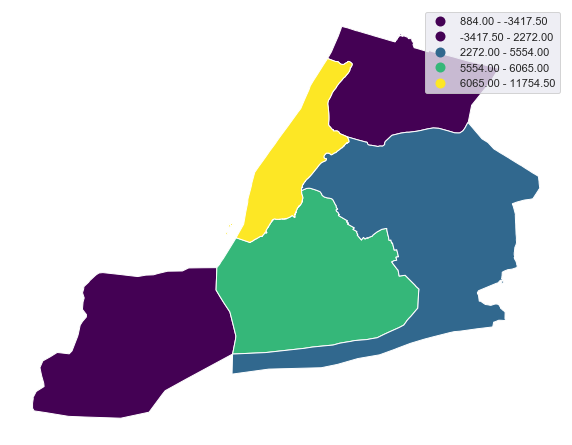

In [91]:
ax=new_york.plot(column='number_of_restaurants',figsize=(10,10),legend=True,cmap='viridis',
                 scheme='BoxPlot')
ax.axis('off')

In [92]:
crimes2=pd.read_csv('crime/NYPD_Complaint_Data_Historic.csv')

In [93]:
crimes=pd.read_csv('crime/NYPD_Complaint_Data_Historic.csv')

In [94]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
CMPLNT_NUM           1048575 non-null int64
CMPLNT_FR_DT         1048510 non-null object
CMPLNT_FR_TM         1048575 non-null object
CMPLNT_TO_DT         842616 non-null object
CMPLNT_TO_TM         843002 non-null object
RPT_DT               1048575 non-null object
KY_CD                1048575 non-null int64
OFNS_DESC            1045695 non-null object
PD_CD                1047842 non-null float64
PD_DESC              1047842 non-null object
CRM_ATPT_CPTD_CD     1048574 non-null object
LAW_CAT_CD           1048575 non-null object
JURIS_DESC           1048575 non-null object
BORO_NM              1048575 non-null object
ADDR_PCT_CD          1048574 non-null float64
LOC_OF_OCCUR_DESC    830823 non-null object
PREM_TYP_DESC        1043886 non-null object
PARKS_NM             7599 non-null object
HADEVELOPT           51772 non-null object
X_COORD_CD           1016158 non-null fl

In [95]:
crimes=crimes[['LAW_CAT_CD','BORO_NM','Latitude','Longitude']]

In [96]:
crimes.dropna(axis=0,inplace=True)

In [97]:
crimes['geometry']=crimes[['Longitude','Latitude']].apply(geographical_point,axis=1)

In [98]:
crimes=gpd.GeoDataFrame(crimes,crs=4326,geometry=crimes.geometry)

In [99]:
crimes['BORO_NM'].unique()

array(['BRONX', 'QUEENS', 'MANHATTAN', 'BROOKLYN', 'STATEN ISLAND'],
      dtype=object)

In [100]:
crimes['BORO_NM']=crimes['BORO_NM'].map({'BRONX':'Bronx','QUEENS':'Queens','MANHATTAN':'Manhattan',
                                        'BROOKLYN':'Brooklyn','STATEN ISLAND':'Staten Island'})

In [101]:
crimes_per_district=crimes.groupby('BORO_NM').count()['geometry']

In [102]:
new_york['number_of_crimes']=0

In [103]:
for district in districts:
    new_york.loc[new_york['BoroName']==district,'number_of_crimes']=crimes_per_district[district]

In [104]:
crimes[crimes['BORO_NM']=='Bronx']['LAW_CAT_CD'].value_counts()

MISDEMEANOR    130958
FELONY          61128
VIOLATION       28023
Name: LAW_CAT_CD, dtype: int64

In [105]:
crimes[crimes['BORO_NM']=='Queens']['LAW_CAT_CD'].value_counts()

MISDEMEANOR    106310
FELONY          68154
VIOLATION       27565
Name: LAW_CAT_CD, dtype: int64

In [106]:
crimes[crimes['BORO_NM']=='Manhattan']['LAW_CAT_CD'].value_counts()

MISDEMEANOR    137068
FELONY          74135
VIOLATION       26630
Name: LAW_CAT_CD, dtype: int64

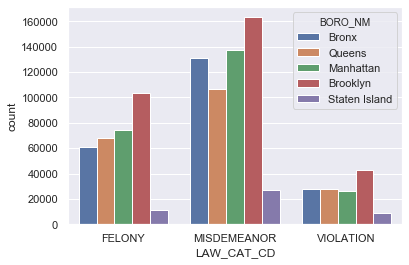

In [107]:
sns.countplot(crimes['LAW_CAT_CD'],hue=crimes['BORO_NM'])

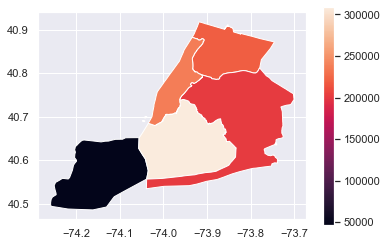

In [108]:
new_york.plot(column='number_of_crimes',legend=True)

In [109]:
new_york

,BoroName,Shape_Leng,Shape_Area,geometry,number_of_listings,number_of_subway_stations,number_of_restaurants,number_of_tourist_attractions,number_of_crimes
0,Bronx,188054.398137,1.598379e+09,"POLYGON ((-73.86477 40.90201, -73.86305 40.901...",1091,70,2272,1,220109
1,Staten Island,210579.552313,2.532696e+09,"POLYGON ((-74.05581 40.64971, -74.05619 40.639...",373,0,884,0,47401
2,Brooklyn,234924.030131,2.684410e+09,"POLYGON ((-73.92722 40.72533, -73.92654 40.724...",20104,169,6065,2,308786
3,Queens,429582.281880,3.858051e+09,"POLYGON ((-73.77896 40.81171, -73.76371 40.793...",5666,82,5554,0,202029
4,Manhattan,203803.483188,9.442946e+08,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",21661,152,9970,22,237833


In [110]:
census=pd.read_csv('census/nyc_census_tracts.csv')

In [111]:
population_by_district=census.groupby('Borough').sum()['TotalPop']

In [112]:
new_york['population']=0

In [113]:
for district in districts:
    new_york.loc[new_york['BoroName']==district,'population']=population_by_district[district]

In [114]:
from geopy.distance import vincenty

In [115]:
tourist_attractions

,name,longitude,latitude,geometry
0,Statue Of Liberty,-74.0445,40.6892,POINT (-74.04450 40.68920)
1,Central Park,-73.9683,40.7851,POINT (-73.96830 40.78510)
2,Rockefeller Center,-73.9787,40.7587,POINT (-73.97870 40.75870)
3,Metropolitan Museum of Art,-73.962311,40.778965,POINT (-73.96231 40.77896)
4,Broadway and the Theater District,-73.974709,40.790886,POINT (-73.97471 40.79089)
5,Empire State Building,-73.985428,40.748817,POINT (-73.98543 40.74882)
6,9/11 Memorial and Museum,-74.008166634,40.7070138386,POINT (-74.00817 40.70701)
7,Times Square,-73.985130,40.758896,POINT (-73.98513 40.75890)
8,High Line,-74.004765,40.747993,POINT (-74.00477 40.74799)
9,Brooklyn Bridge,-73.996864,40.706086,POINT (-73.99686 40.70609)


In [116]:
SOL=(40.6892,-74.0445)
RC=(40.7587,-73.9787)

In [117]:
vincenty(SOL,RC)

Distance(9.511545738854107)

In [118]:
SOL=[-74.0445,40.6892]
RC=[-73.9787,40.7587]

In [119]:
vincenty(SOL,RC).kilometers

7.648616861930004

In [120]:
geo_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,geometric_points
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,POINT (-73.97237 40.64749)
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,POINT (-73.98377 40.75362)
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,POINT (-73.94190 40.80902)
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,POINT (-73.95976 40.68514)
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,POINT (-73.94399 40.79851)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9,POINT (-73.94995 40.67853)
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36,POINT (-73.93317 40.70184)
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27,POINT (-73.94867 40.81475)
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2,POINT (-73.99112 40.75751)


In [121]:
def get_number_of_close_restaurants(ID_col):
    boro_name=list(geo_data.loc[geo_data['id']==ID_col,'neighbourhood_group'])[0]
    local_restaurants_lats=list(restaurants_NYC.loc[restaurants_NYC['BoroName']==boro_name,
                                                    'latitude'])
    local_restaurants_long=list(restaurants_NYC.loc[restaurants_NYC['BoroName']==boro_name,
                                                    'longitude'])
    airBNB_lat=geo_data.loc[geo_data['id']==ID_col,'latitude'].values[0]
    airBNB_lon=geo_data.loc[geo_data['id']==ID_col,'longitude'].values[0]
    airBNB_location=[airBNB_lat,airBNB_lon]
    restaurants_coordinates=[]
    distances=[]
    close=[]
    for x in range(0,len(local_restaurants_lats)):
        restaurants_coordinates.append([local_restaurants_lats[x],local_restaurants_long[x]])
        distances.append(vincenty(airBNB_location,restaurants_coordinates[x]).kilometers)

    for dist in distances:
        if dist<0.5:
            close.append(dist)

    return len(close)
    

In [122]:
geo_data.drop('number_of_close_restaurants(KM)',axis=1,inplace=True)

KeyError: "['number_of_close_restaurants(KM)'] not found in axis"

Brooklyn distance to restaurants


In [131]:
ID_cols=list(geo_data[geo_data['neighbourhood_group']=='Staten Island']['id'])
boro_name='Staten Island'
lat=list(geo_data.loc[geo_data['id']==ID_cols[0],'latitude'])
lon=list(geo_data.loc[geo_data['id']==ID_cols[0],'longitude'])
loc=[lat,lon]
loc

[[40.64524], [-74.08088000000001]]

In [132]:
for i,ID_col in enumerate(ID_cols):   
    local_restaurants_lats=list(restaurants_NYC.loc[restaurants_NYC['BoroName']==boro_name,
                                                    'latitude'])
    local_restaurants_long=list(restaurants_NYC.loc[restaurants_NYC['BoroName']==boro_name,
                                                    'longitude'])
    airBNB_lat=list(geo_data.loc[geo_data['id']==ID_col,'latitude'])[0]
    airBNB_lon=list(geo_data.loc[geo_data['id']==ID_col,'longitude'])[0]
    airBNB_location=[airBNB_lat,airBNB_lon]
    restaurants_coordinates=[]
    distances=[]
    close=[]
    for x in range(0,len(local_restaurants_lats)):
        restaurants_coordinates.append([local_restaurants_lats[x],local_restaurants_long[x]])
        distances.append(vincenty(airBNB_location,restaurants_coordinates[x]).kilometers)

    for dist in distances:
        if dist<0.5:
            close.append(dist)
    if i%100==0:
        print('iteration number: {}'.format(i))
    
    geo_data.loc[geo_data['id']==ID_col,'number_of_close_restaurants']=len(close)

iteration number: 0
iteration number: 100
iteration number: 200
iteration number: 300


In [139]:
geo_data.to_csv(r'C:\Users\dayil\Downloads\VA data\geo_data.csv')

In [ ]:
linewidth=0.2,edgecolor='black'

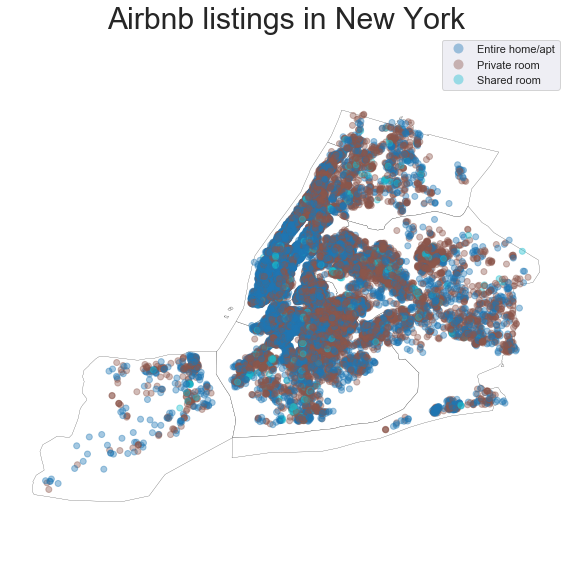

In [183]:
ax=new_york.plot(color='white',linewidth=0.2,edgecolor='black',figsize=(10,10))
ax.axis('off')
ax.axis('equal')
ax.set_title('Airbnb listings in New York',size=30)
geo_data.plot(alpha=0.4,ax=ax,column='room_type',legend=True)

Text(0.5, 1, 'Prices of Airbnb listings in New York')

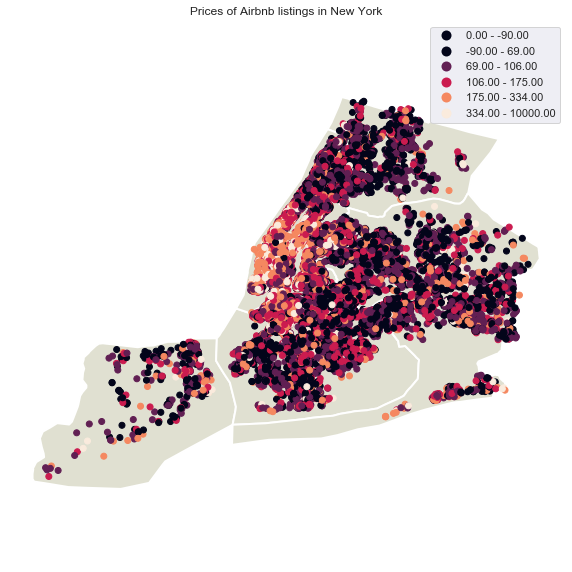

In [202]:
ax=new_york.plot(color='#e0e0d1',linewidth=2,edgecolor='white',figsize=(10,10))
ax.axis('off')
ax.axis('equal')
geo_data.plot(ax=ax,column='price',scheme='BoxPlot',legend=True)
ax.set_title('Prices of Airbnb listings in New York')


In [136]:
geo_data[geo_data['number_of_close_restaurants']>0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,geometric_points,number_of_close_restaurants
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,POINT (-73.97237 40.64749),26.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,POINT (-73.98377 40.75362),99.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,POINT (-73.94190 40.80902),26.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,POINT (-73.95976 40.68514),65.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,POINT (-73.94399 40.79851),20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9,POINT (-73.94995 40.67853),70.0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36,POINT (-73.93317 40.70184),39.0
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27,POINT (-73.94867 40.81475),11.0
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2,POINT (-73.99112 40.75751),814.0


In [137]:
geo_data[geo_data['number_of_close_restaurants'].isnull()]['neighbourhood_group'].value_counts()

Series([], Name: neighbourhood_group, dtype: int64)

In [138]:
restaurants_NYC.drop(['index_right','Shape_Leng','Shape_Area','number_of_listings'],inplace=True,axis=1)

KeyError: "['number_of_listings'] not found in axis"

In [1914]:
restaurants_NYC.to_csv(r'C:\Users\dayil\Downloads\VA data\restaurants.csv')

In [1917]:
crimes.to_csv(r'C:\Users\dayil\Downloads\VA data\crimes.csv')

In [1925]:
tourist_attractions_NYC.drop(['index_right','Shape_Leng','Shape_Area',
                              'number_of_listings','number_of_restaurants'],
                            inplace=True,
                            axis=1)

In [1927]:
tourist_attractions_NYC.to_csv(r'C:\Users\dayil\Downloads\VA data\tourist_attractions.csv')

In [1929]:
subway_stations_NYC.drop(['index_right','Shape_Leng','Shape_Area',
                              'number_of_listings','number_of_restaurants'],
                            inplace=True,
                            axis=1)

In [1930]:
subway_stations_NYC.to_csv(r'C:\Users\dayil\Downloads\VA data\subway_stations.csv')

In [1931]:
new_york

,BoroName,Shape_Leng,Shape_Area,geometry,number_of_listings,number_of_subway_stations,number_of_restaurants,number_of_tourist_attractions,number_of_crimes,population
0,Bronx,188054.398137,1.598379e+09,"POLYGON ((-73.86477 40.90201, -73.86305 40.901...",1091,70,2272,1,220109.0,1428357
1,Staten Island,210579.552313,2.532696e+09,"POLYGON ((-74.05581 40.64971, -74.05619 40.639...",373,0,884,0,47401.0,472481
2,Brooklyn,234924.030131,2.684410e+09,"POLYGON ((-73.92722 40.72533, -73.92654 40.724...",20104,169,6065,2,308786.0,2595259
3,Queens,429582.281880,3.858051e+09,"POLYGON ((-73.77896 40.81171, -73.76371 40.793...",5666,82,5554,0,202029.0,2301139
4,Manhattan,203803.483188,9.442946e+08,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",21661,152,9970,22,237833.0,1629507


AttributeError: 'AxesSubplot' object has no attribute 'colorbar'

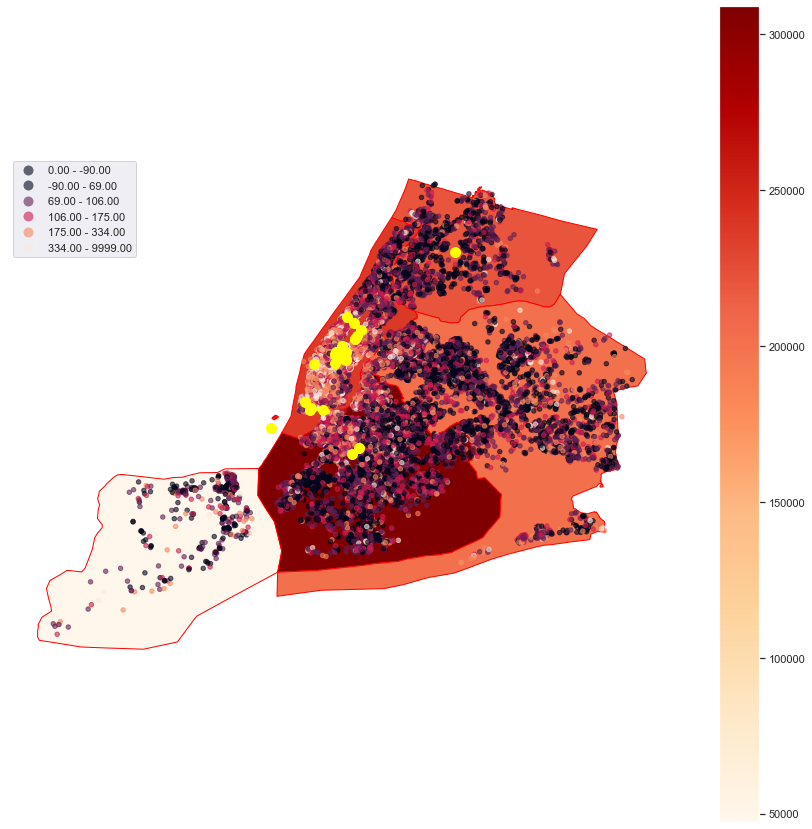

In [2060]:
ax=new_york.plot(figsize=(15,15),column='number_of_crimes',edgecolor='red', linewidth=1,cmap='OrRd',legend=True)
ax.axis('off')
# restaurants_NYC.plot(ax=ax,alpha=0.4,color='green')
geo_data.plot(ax=ax,markersize=20,alpha=0.6,column='price',legend='True',scheme='BoxPlot')
tourist_attractions_NYC.plot(ax=ax,color='yellow',markersize=100,marker='o')
ax.colorbar(orientation="horizontal")



In [2013]:
geo_data_rooms=geo_data[geo_data['room_type']=='Private room']
geo_data_flats=geo_data[geo_data['room_type']=='Entire home/apt']
geo_data_shared_room=geo_data[geo_data['room_type']=='Shared room']

In [2014]:
geo_data_rooms['price'].describe()

count    22325.000000
mean        89.337066
std        145.833015
min          0.000000
25%         50.000000
50%         70.000000
75%         95.000000
max       9999.000000
Name: price, dtype: float64

In [2028]:
geo_data_flats

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,geometric_points,number_of_close_restaurants
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,POINT (-73.98377 40.75362),99.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,POINT (-73.95976 40.68514),65.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,POINT (-73.94399 40.79851),20.0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129,POINT (-73.97500 40.74767),333.0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188,POINT (-73.99037 40.71344),165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48879,36480292,Gorgeous 1.5 Bdr with a private yard- Williams...,540335,Lee,Brooklyn,Williamsburg,40.71728,-73.94394,Entire home/apt,120,20,0,0.00,1,22,POINT (-73.94394 40.71728),54.0
48880,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,0.00,3,365,POINT (-73.94220 40.71232),82.0
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,0.00,1,176,POINT (-73.96723 40.75561),649.0
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,0.00,3,365,POINT (-73.94220 40.71232),82.0


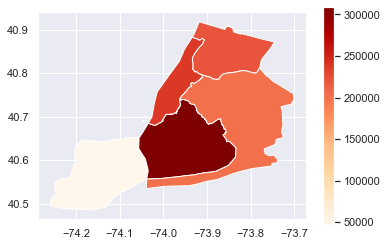

In [2054]:
new_york.plot(column='number_of_crimes',cmap='OrRd',legend=True)

In [2063]:
crimes_per_district

BORO_NM
Bronx            220109
Brooklyn         308786
Manhattan        237833
Queens           202029
Staten Island     47401
Name: geometry, dtype: int64

In [2069]:
for i in range(5):
    geo_data.loc[geo_data['neighbourhood_group']==crimes_per_district.index[i],'number_of_crimes']=crimes_per_district[crimes_per_district.index[i]]

In [2070]:
geo_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,geometric_points,number_of_close_restaurants,number_of_crimes
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,POINT (-73.97237 40.64749),26.0,308786.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,POINT (-73.98377 40.75362),99.0,237833.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,POINT (-73.94190 40.80902),26.0,237833.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,POINT (-73.95976 40.68514),65.0,308786.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,POINT (-73.94399 40.79851),20.0,237833.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9,POINT (-73.94995 40.67853),70.0,308786.0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36,POINT (-73.93317 40.70184),39.0,308786.0
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27,POINT (-73.94867 40.81475),11.0,237833.0
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2,POINT (-73.99112 40.75751),814.0,237833.0


In [2075]:
exp_sub=gpd.read_file('subway2/geo_export_15e1fa1c-925b-45f9-8544-a91d446496dc.shp')

In [239]:
sub_data=pd.read_csv('subway2\sub_data.csv')

In [240]:
sub_data['geometry'][0]

'POINT (-73.99106999861966 40.73005400028963)'

In [241]:
def get_long_from_point(geometry):
    lon_lat=geometry.split('(')[1]
    lon_lat_2=lon_lat.split(')')[0]
    lon=lon_lat_2.split(' ')[0]
    lat=lon_lat_2.split(' ')[1]
    return lon
def get_lat_from_point(geometry):
    lon_lat=geometry.split('(')[1]
    lon_lat_2=lon_lat.split(')')[0]
    lon=lon_lat_2.split(' ')[0]
    lat=lon_lat_2.split(' ')[1]
    return lat

In [242]:
sub_data['longitude']=sub_data['geometry'].apply(get_long_from_point)
sub_data['latitude']=sub_data['geometry'].apply(get_lat_from_point)

In [245]:
sub_data

,Unnamed: 0,line,name,geometry,longitude,latitude
0,0,4-6-6 Express,Astor Pl,POINT (-73.99106999861966 40.73005400028963),-73.99106999861966,40.73005400028963
1,1,4-6-6 Express,Canal St,POINT (-74.00019299927328 40.71880300107693),-74.00019299927328,40.71880300107693
2,2,1-2,50th St,POINT (-73.98384899986625 40.76172799961405),-73.98384899986625,40.76172799961405
3,3,2-3-4,Bergen St,POINT (-73.97499915116808 40.68086213682939),-73.97499915116808,40.68086213682939
4,4,3-4,Pennsylvania Ave,POINT (-73.89488591154061 40.66471445143551),-73.89488591154061,40.66471445143551
...,...,...,...,...,...,...
468,468,D-F-N-Q,Coney Island - Stillwell Av,POINT (-73.9812359981396 40.57728100006734),-73.9812359981396,40.57728100006734
469,469,7-7 Express,34th St - Hudson Yards,POINT (-74.00219709442206 40.7554463596158),-74.00219709442206,40.7554463596158
470,470,Q,72nd St,POINT (-73.95836178682246 40.76880251014879),-73.95836178682246,40.76880251014879
471,471,Q,86th St,POINT (-73.95177090964917 40.77786104333148),-73.95177090964917,40.77786104333148


In [246]:
ID_cols=list(geo_data_no_outliers['id'])

In [247]:
for i,ID_col in enumerate(ID_cols):   
    subways_lat=list(sub_data['latitude'])
    subways_lon=list(sub_data['longitude'])
    airBNB_lat=list(geo_data_no_outliers.loc[geo_data['id']==ID_col,'latitude'])[0]
    airBNB_lon=list(geo_data_no_outliers.loc[geo_data['id']==ID_col,'longitude'])[0]
    airBNB_location=[airBNB_lat,airBNB_lon]
    sub_coordinates=[]
    distances=[]
    close=[]
    for x in range(0,len(subways_lat)):
        sub_coordinates.append([subways_lat[x],subways_lon[x]])
        distances.append(vincenty(airBNB_location,sub_coordinates[x]).kilometers)

#     for dist in distances:
#         if dist<0.5:
#             close.append(dist)
    if i%100==0:
        print('iteration number: {}'.format(i))
    
    geo_data_no_outliers.loc[geo_data_no_outliers['id']==ID_col,'distance_closest_metro_station(KM)']=min(distances)

iteration number: 0
iteration number: 100
iteration number: 200
iteration number: 300
iteration number: 400
iteration number: 500
iteration number: 600
iteration number: 700
iteration number: 800
iteration number: 900
iteration number: 1000
iteration number: 1100
iteration number: 1200
iteration number: 1300
iteration number: 1400
iteration number: 1500
iteration number: 1600
iteration number: 1700
iteration number: 1800
iteration number: 1900
iteration number: 2000
iteration number: 2100
iteration number: 2200
iteration number: 2300
iteration number: 2400
iteration number: 2500
iteration number: 2600
iteration number: 2700
iteration number: 2800
iteration number: 2900
iteration number: 3000
iteration number: 3100
iteration number: 3200
iteration number: 3300
iteration number: 3400
iteration number: 3500
iteration number: 3600
iteration number: 3700
iteration number: 3800
iteration number: 3900
iteration number: 4000
iteration number: 4100
iteration number: 4200
iteration number: 4300


iteration number: 34700
iteration number: 34800
iteration number: 34900
iteration number: 35000
iteration number: 35100
iteration number: 35200
iteration number: 35300
iteration number: 35400
iteration number: 35500
iteration number: 35600
iteration number: 35700
iteration number: 35800
iteration number: 35900
iteration number: 36000
iteration number: 36100
iteration number: 36200
iteration number: 36300
iteration number: 36400
iteration number: 36500
iteration number: 36600
iteration number: 36700
iteration number: 36800
iteration number: 36900
iteration number: 37000
iteration number: 37100
iteration number: 37200
iteration number: 37300
iteration number: 37400
iteration number: 37500
iteration number: 37600
iteration number: 37700
iteration number: 37800
iteration number: 37900
iteration number: 38000
iteration number: 38100
iteration number: 38200
iteration number: 38300
iteration number: 38400
iteration number: 38500
iteration number: 38600
iteration number: 38700
iteration number

In [251]:
geo_data_no_outliers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,geometric_points,number_of_close_restaurants,distance_closest_metro_station(KM),distance_to_tourist_attractions
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,POINT (-73.97237 40.64749),26.0,0.465405,11.432682
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,POINT (-73.98377 40.75362),99.0,0.093432,3.645303
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,POINT (-73.94190 40.80902),26.0,0.334336,8.190825
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,POINT (-73.95976 40.68514),65.0,0.416772,8.047121
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,POINT (-73.94399 40.79851),20.0,0.200695,7.196083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9,POINT (-73.94995 40.67853),70.0,0.215667,NaN
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36,POINT (-73.93317 40.70184),39.0,0.478807,NaN
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27,POINT (-73.94867 40.81475),11.0,0.363278,NaN
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2,POINT (-73.99112 40.75751),814.0,0.119085,NaN


In [252]:
ID_cols=list(geo_data_no_outliers['id'])

In [253]:
for i,ID_col in enumerate(ID_cols):   
    tourist_attractions_lat=list(tourist_attractions_NYC['latitude'])
    tourist_attractions_lon=list(tourist_attractions_NYC['longitude'])
    airBNB_lat=list(geo_data_no_outliers.loc[geo_data_no_outliers['id']==ID_col,'latitude'])[0]
    airBNB_lon=list(geo_data_no_outliers.loc[geo_data_no_outliers['id']==ID_col,'longitude'])[0]
    airBNB_location=[airBNB_lat,airBNB_lon]
    tourist_coordinates=[]
    distances=[]
    close=[]
    for x in range(0,len(tourist_attractions_lat)):
        tourist_coordinates.append([tourist_attractions_lat[x],tourist_attractions_lon[x]])
        distances.append(vincenty(airBNB_location,tourist_coordinates[x]).kilometers)

#     for dist in distances:
#         if dist<0.5:
#             close.append(dist)
    if i%100==0:
        print('iteration number: {}'.format(i))
    
    geo_data_no_outliers.loc[geo_data_no_outliers['id']==ID_col,'distance_to_tourist_attractions']=np.mean(distances)

iteration number: 0
iteration number: 100
iteration number: 200
iteration number: 300
iteration number: 400
iteration number: 500
iteration number: 600
iteration number: 700
iteration number: 800
iteration number: 900
iteration number: 1000
iteration number: 1100
iteration number: 1200
iteration number: 1300
iteration number: 1400
iteration number: 1500
iteration number: 1600
iteration number: 1700
iteration number: 1800
iteration number: 1900
iteration number: 2000
iteration number: 2100
iteration number: 2200
iteration number: 2300
iteration number: 2400
iteration number: 2500
iteration number: 2600
iteration number: 2700
iteration number: 2800
iteration number: 2900
iteration number: 3000
iteration number: 3100
iteration number: 3200
iteration number: 3300
iteration number: 3400
iteration number: 3500
iteration number: 3600
iteration number: 3700
iteration number: 3800
iteration number: 3900
iteration number: 4000
iteration number: 4100
iteration number: 4200
iteration number: 4300


iteration number: 34700
iteration number: 34800
iteration number: 34900
iteration number: 35000
iteration number: 35100
iteration number: 35200
iteration number: 35300
iteration number: 35400
iteration number: 35500
iteration number: 35600
iteration number: 35700
iteration number: 35800
iteration number: 35900
iteration number: 36000
iteration number: 36100
iteration number: 36200
iteration number: 36300
iteration number: 36400
iteration number: 36500
iteration number: 36600
iteration number: 36700
iteration number: 36800
iteration number: 36900
iteration number: 37000
iteration number: 37100
iteration number: 37200
iteration number: 37300
iteration number: 37400
iteration number: 37500
iteration number: 37600
iteration number: 37700
iteration number: 37800
iteration number: 37900
iteration number: 38000
iteration number: 38100
iteration number: 38200
iteration number: 38300
iteration number: 38400
iteration number: 38500
iteration number: 38600
iteration number: 38700
iteration number

Text(0.5, 1.0, 'average distance to touristic attractions')

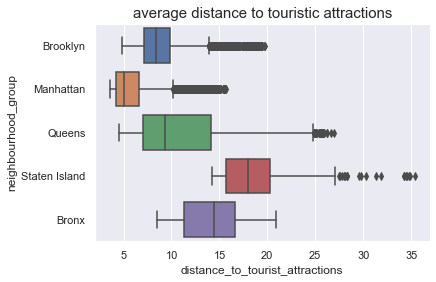

In [268]:
ax=sns.boxplot(geo_data_no_outliers['distance_to_tourist_attractions'],
           geo_data_no_outliers['neighbourhood_group'])
ax.set_title('average distance to touristic attractions',size=15)

Text(0.5, 1, 'price of  hosts with multiplle listings')

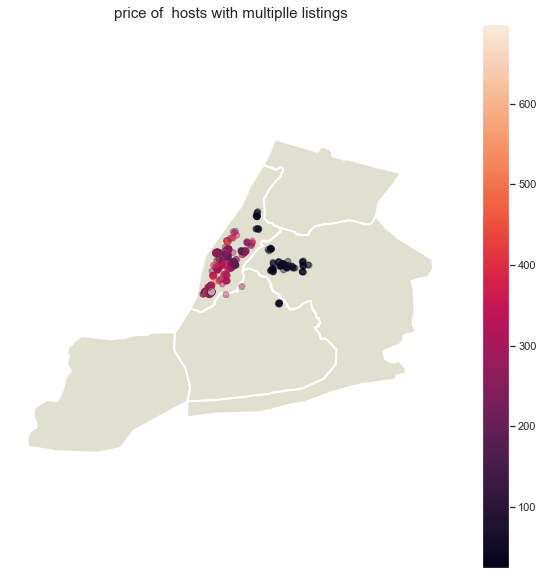

In [284]:
ax=new_york.plot(color='#e0e0d1',linewidth=2,edgecolor='white',figsize=(10,10))
ax.axis('off')
ax.axis('equal')
geo_data_no_outliers[geo_data_no_outliers['calculated_host_listings_count']>100].plot(ax=ax,
                                                                                     column='price'
                                                                                     ,legend=True,
                                                                                     alpha=0.4)
ax.set_title('price of  hosts with multiplle listings',size=15)

In [277]:
geo_data_no_outliers[geo_data_no_outliers['calculated_host_listings_count']>100]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,geometric_points,number_of_close_restaurants,distance_closest_metro_station(KM),distance_to_tourist_attractions
9740,7491713,NYC Lavish Studio Apartment Steps from SoHo!,30283594,Kara,Manhattan,Financial District,40.70862,-74.01408,Entire home/apt,169,30,3,0.09,121,364,POINT (-74.01408 40.70862),167.0,0.125466,6.201292
10075,7730160,Furnished NYC 1BR apt near Rockefeller Center!!!,30283594,Kara,Manhattan,Theater District,40.75967,-73.98573,Entire home/apt,135,30,0,0.00,121,174,POINT (-73.98573 40.75967),141.0,0.129219,3.724965
10335,7913426,LUX 1-Bedroom NYC Apartment Near Times Square!,30283594,Kara,Manhattan,Theater District,40.75654,-73.98891,Entire home/apt,369,30,0,0.00,121,364,POINT (-73.98891 40.75654),391.0,0.110123,3.769601
10398,7966358,NYC High End 2BR Midtown West Apt,30283594,Kara,Manhattan,Midtown,40.76633,-73.98145,Entire home/apt,335,30,0,0.00,121,201,POINT (-73.98145 40.76633),70.0,0.205164,3.924473
10490,8045421,NYC Chelsea Luxury 1BR Apt,30283594,Kara,Manhattan,Chelsea,40.74465,-73.99253,Entire home/apt,129,30,3,0.07,121,161,POINT (-73.99253 40.74465),47.0,0.189347,4.063876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48723,36404684,Smart Nolita 1BR w/ W/D near famous cafes by B...,107434423,Blueground,Manhattan,Nolita,40.72283,-73.99472,Entire home/apt,316,30,0,0.00,232,325,POINT (-73.99472 40.72283),351.0,0.212812,5.038343
48724,36404784,Dapper Hell's Kitchen 2BR w/ Gym + W/D + Door...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76082,-73.99709,Entire home/apt,385,30,0,0.00,232,338,POINT (-73.99709 40.76082),482.0,0.733364,4.193045
48725,36404815,Trendy Hell's Kitchen 1BR w/ Gym + W/D + Doorm...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76083,-73.99727,Entire home/apt,267,30,0,0.00,232,228,POINT (-73.99727 40.76083),481.0,0.728371,4.201514
48726,36404936,Beautiful Williamsburg 2BR w/ Skyline views + ...,107434423,Blueground,Brooklyn,Williamsburg,40.71493,-73.96365,Entire home/apt,278,30,0,0.00,232,188,POINT (-73.96365 40.71493),135.0,0.640650,5.817097


In [272]:
top_investors[219517861 
107434423    
30283594     
137358866    
12243051 ]

SyntaxError: invalid syntax (<ipython-input-272-1577d17d8727>, line 2)

In [2165]:
geo_data_no_outliers['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [2175]:
geo_data_room=geo_data_no_outliers[geo_data_no_outliers['room_type']=='Private room']
geo_data_apt=geo_data_no_outliers[geo_data_no_outliers['room_type']=='Entire home/apt']
geo_data_shared_room=geo_data_no_outliers[geo_data_no_outliers['room_type']=='Shared room']

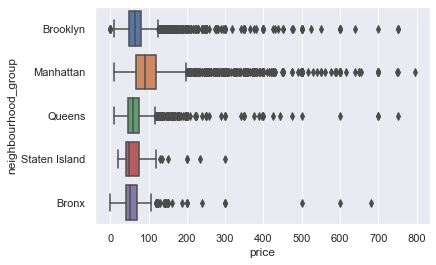

In [2184]:
sns.boxplot(geo_data_room['price'],geo_data_room['neighbourhood_group'])

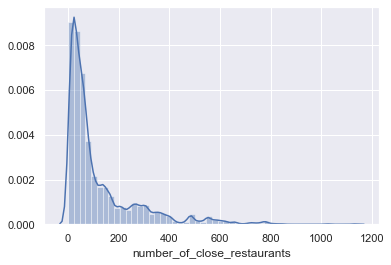

In [2186]:
sns.distplot(geo_data_no_outliers['number_of_close_restaurants'])

In [209]:
    geo_data_no_outliers[geo_data_no_outliers['price']<0]

IndexError: too many indices for array

Empty GeoDataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365, geometric_points, number_of_close_restaurants]
Index: []

Text(0.5, 1, 'Location of restaurants in New York')

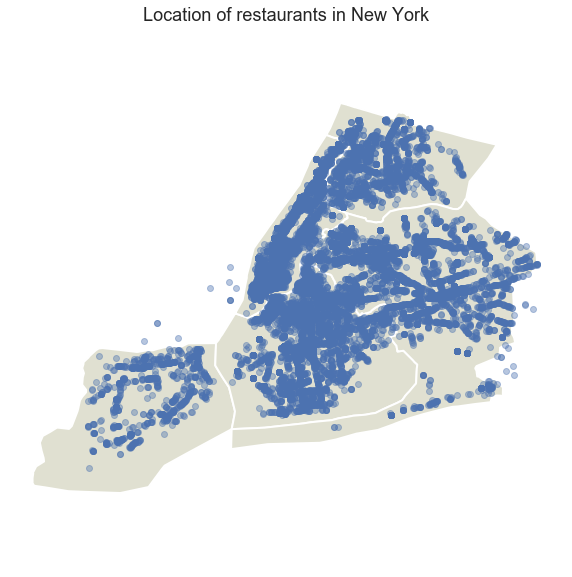

In [236]:
ax=new_york.plot(color='#e0e0d1',linewidth=2,edgecolor='white',figsize=(10,10))
ax.axis('off')
ax.axis('equal')
restaurants.plot(ax=ax,alpha=0.4)
ax.set_title('Location of restaurants in New York',size=18)

In [213]:
nicks=['statue of liberty','central park','Rockefeller Center','MET','District Theater',
      'Empire SB','9/11 M&M','Times Square','High Line','Brooklyn Bridge','5th avenue',
      'GC Terminal','one world Obsv','The Frick coll','NY lib','Wall Street',
      'Radio city','St Patricks Cath','Carnegie Hall','Bryant Park','Chrysler Building','Broadway theater',
      'Prospect Park','Brooklyn Museum','Bronx zoo']


In [215]:
for i,nick in enumerate(nicks):
    tourist_attractions.iloc[i]['tag']=nick

In [287]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [290]:
geo_data_no_outliers['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [300]:
geo_data_no_outliers_3=geo_data_no_outliers.drop(['id','name','host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','geometric_points'],axis=1)

In [301]:
geo_data_no_outliers_rooms=geo_data_no_outliers_3[geo_data_no_outliers_3['room_type']=='Private room']
                                                

In [302]:
geo_data_no_outliers_flat=geo_data_no_outliers_3[geo_data_no_outliers_3['room_type']=='Entire home/apt']

In [303]:
geo_data_no_outliers_shared=geo_data_no_outliers_3[geo_data_no_outliers_3['room_type']=='Shared room']

In [306]:
geo_data_no_outliers_flat.drop('room_type',inplace=True,axis=1)

In [307]:
geo_data_no_outliers_flat

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_close_restaurants,distance_closest_metro_station(KM),distance_to_tourist_attractions
1,225,1,45,0.38,2,355,99.0,0.093432,3.645303
3,89,1,270,4.64,1,194,65.0,0.416772,8.047121
4,80,10,9,0.10,1,0,20.0,0.200695,7.196083
5,200,3,74,0.59,1,129,333.0,0.426808,3.856152
9,150,1,160,1.33,4,188,165.0,0.048886,5.520163
...,...,...,...,...,...,...,...,...,...
48879,120,20,0,0.00,1,22,54.0,0.300275,6.416667
48880,120,1,0,0.00,3,365,82.0,0.165935,6.776183
48886,200,6,0,0.00,1,176,649.0,0.258438,3.938401
48887,170,1,0,0.00,3,365,82.0,0.165935,6.776183


In [308]:
from sklearn.preprocessing import StandardScaler

In [309]:
scaler=StandardScaler()

In [310]:
scaler.fit(geo_data_no_outliers_flat)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [311]:
scaled_flats=scaler.transform(geo_data_no_outliers_flat)

In [326]:
scaled_flats_df=pd.DataFrame(data=scaled_flats,columns=geo_data_no_outliers_flat.columns)

In [327]:
scaled_flats_df['price'].max()

5.564331395833064

In [328]:
X=scaled_flats_df

In [331]:
X=X.drop('price',axis=1)

In [332]:
Y=scaled_flats_df['price']

In [335]:
x1=sm.add_constant(X)

In [337]:
model=sm.OLS(Y,x1).fit()

In [338]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     506.3
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:47:04   Log-Likelihood:                -33614.
No. Observations:               25013   AIC:                         6.725e+04
Df Residuals:                   25004   BIC:                         6.732e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                1.18e-16      0.006   2.01e-14      1.000      -0.011       0.011
minimum_nights                        -0.0854      0.006    -13.985      0.000      -0.097      -0.073
number_of_reviews                     -0.1013      0.007    -13.886      0.000      -0.116      -0.087
reviews_per_month                      0.0151      0.007      2.048      0.041       0.001       0.030
calculated_host_listings_count         0.0192      0.006      3.036      0.002       0.007       0.032
availability_365                       0.2144      0.006     32.986      0.000       0.202       0.227
number_of_close_restaurants            0.0651      0.007      9.566      0.000       0.052       0.078
distance_closest_metro_station(KM)     0.0546      0.007      8.086      0.000       0.041       0.068
distance_to_tourist_attractions       -0.2863      0.008    -36.841      0.000      -0.301      -0.271
==============================================================================
Omnibus:                    10861.020   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56419.484
Skew:                           2.075   Prob(JB):                         0.00
Kurtosis:                       9.075   Cond. No.                         2.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [377]:
manhattan=geo_data_no_outliers

In [378]:
manhattan=manhattan[manhattan['neighbourhood_group']=='Brooklyn']

In [379]:
manhattan_flats=manhattan[manhattan['room_type']=='Entire home/apt']

In [380]:
manhattan_flats

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,geometric_points,number_of_close_restaurants,distance_closest_metro_station(KM),distance_to_tourist_attractions
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,POINT (-73.95976 40.68514),65.0,0.416772,8.047121
15,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,1.20,1,46,POINT (-73.95352 40.70837),116.0,0.164374,6.558477
16,7097,Perfect for Your Parents + Garden,17571,Jane,Brooklyn,Fort Greene,40.69169,-73.97185,Entire home/apt,215,2,198,1.72,1,321,POINT (-73.97185 40.69169),66.0,0.584780,7.274664
18,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,4.44,1,21,POINT (-73.94694 40.67592),49.0,0.581872,9.186513
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,0.07,1,0,POINT (-73.95718 40.71842),101.0,0.145047,5.813997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48870,36474911,"Cozy, clean Williamsburg 1- bedroom apartment",1273444,Tanja,Brooklyn,Williamsburg,40.71197,-73.94946,Entire home/apt,99,4,0,0.00,1,22,POINT (-73.94946 40.71197),93.0,0.188450,6.487393
48873,36477307,Brooklyn paradise,241945355,Clement & Rose,Brooklyn,Flatlands,40.63116,-73.92616,Entire home/apt,170,1,0,0.00,2,363,POINT (-73.92616 40.63116),10.0,1.818502,14.107994
48879,36480292,Gorgeous 1.5 Bdr with a private yard- Williams...,540335,Lee,Brooklyn,Williamsburg,40.71728,-73.94394,Entire home/apt,120,20,0,0.00,1,22,POINT (-73.94394 40.71728),54.0,0.300275,6.416667
48880,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,0.00,3,365,POINT (-73.94220 40.71232),82.0,0.165935,6.776183


In [381]:
manhattan_flats=manhattan_flats[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','geometric_points','number_of_close_restaurants','distance_closest_metro_station(KM)','distance_to_tourist_attractions']]

In [382]:
manhattan_flats.drop('geometric_points',axis=1,inplace=True)

In [383]:
scaled_man=StandardScaler()

In [384]:
scaled_man.fit(manhattan_flats)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [385]:
scaled_manhattan=scaled_man.transform(manhattan_flats)

In [386]:
scaled_manhattan_df=pd.DataFrame(data=scaled_manhattan,columns=manhattan_flats.columns)

In [387]:
X=scaled_manhattan_df

In [388]:
Y=scaled_manhattan_df['price']

In [389]:
X=X.drop('price',axis=1)

In [390]:
X

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_close_restaurants,distance_closest_metro_station(KM),distance_to_tourist_attractions
0,-0.313479,5.103590,2.386807,-0.152054,0.808247,0.089762,0.091269,-0.241536
1,-0.256711,2.529969,0.046622,-0.152054,-0.419489,1.062282,-0.820635,-0.857018
2,-0.256711,3.584732,0.400371,-0.152054,1.861776,0.108831,0.698275,-0.560910
3,-0.199943,0.525920,2.250750,-0.152054,-0.626877,-0.215343,0.687766,0.229547
4,-0.199943,-0.402272,-0.722102,-0.152054,-0.801082,0.776247,-0.890461,-1.164824
...,...,...,...,...,...,...,...,...
9476,-0.143175,-0.592129,-0.769722,-0.152054,-0.618581,0.623695,-0.733649,-0.886408
9477,-0.313479,-0.592129,-0.769722,0.030176,2.210188,-0.959035,5.155658,2.264339
9478,0.765116,-0.592129,-0.769722,-0.152054,-0.618581,-0.119997,-0.329629,-0.915649
9479,-0.313479,-0.592129,-0.769722,0.212407,2.226779,0.413935,-0.814994,-0.767007


In [391]:
x1=sm.add_constant(X)

In [392]:
model_brooklyn=sm.OLS(Y,x1).fit()

In [394]:
model_brooklyn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     148.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          1.61e-235
Time:                        23:02:31   Log-Likelihood:                -12895.
No. Observations:                9481   AIC:                         2.581e+04
Df Residuals:                    9472   BIC:                         2.587e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               1.396e-16      0.010   1.44e-14      1.000      -0.019       0.019
minimum_nights                        -0.0701      0.010     -7.066      0.000      -0.089      -0.051
number_of_reviews                     -0.0917      0.012     -7.403      0.000      -0.116      -0.067
reviews_per_month                     -0.0375      0.013     -2.992      0.003      -0.062      -0.013
calculated_host_listings_count        -0.0263      0.010     -2.630      0.009      -0.046      -0.007
availability_365                       0.2477      0.011     23.197      0.000       0.227       0.269
number_of_close_restaurants            0.1046      0.011      9.935      0.000       0.084       0.125
distance_closest_metro_station(KM)     0.0203      0.010      2.026      0.043       0.001       0.040
distance_to_tourist_attractions       -0.2141      0.011    -20.114      0.000      -0.235      -0.193
==============================================================================
Omnibus:                     4848.994   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36817.911
Skew:                           2.355   Prob(JB):                         0.00
Kurtosis:                      11.428   Cond. No.                         2.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [366]:
model_man=sm.OLS(Y,x1).fit()

In [367]:
model_man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     186.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          7.15e-299
Time:                        22:58:34   Log-Likelihood:                -17592.
No. Observations:               12895   AIC:                         3.520e+04
Df Residuals:                   12886   BIC:                         3.527e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               5.551e-17      0.008   6.66e-15      1.000      -0.016       0.016
minimum_nights                        -0.0957      0.009    -10.917      0.000      -0.113      -0.078
number_of_reviews                     -0.1017      0.010    -10.059      0.000      -0.121      -0.082
reviews_per_month                      0.0791      0.010      7.837      0.000       0.059       0.099
calculated_host_listings_count         0.0101      0.009      1.093      0.274      -0.008       0.028
availability_365                       0.1954      0.010     20.555      0.000       0.177       0.214
number_of_close_restaurants           -0.0252      0.009     -2.750      0.006      -0.043      -0.007
distance_closest_metro_station(KM)    -0.0480      0.008     -5.679      0.000      -0.065      -0.031
distance_to_tourist_attractions       -0.2316      0.009    -25.007      0.000      -0.250      -0.213
==============================================================================
Omnibus:                     4919.682   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19631.802
Skew:                           1.889   Prob(JB):                         0.00
Kurtosis:                       7.719   Cond. No.                         1.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [400]:
model.score()

AttributeError: 'OLSResults' object has no attribute 'score'